In [1]:
'''ST10134058 Shivam Mayur Pillay PDAN8411 POE'''
print()

In [2]:
'''
The data set is from (Lakshmipathi 2019) which looks at 50000 movie reviews. 
The data set is broken into two columns, the review column and whether or not the review is positive or negative. 
'''
print()

In [3]:
# What is text processing
'''
According to DataRobot (2020), Text processing is an automated analysis of electronic text records. In machine learning one is able to generate information 
which is structured so that it can be manipulated, used to generate now text outputs or for general analysis (DataRobot 2020). DataRobot (2020), compares text 
processing and natural language processing (NLP) stating that NLP differs in its ability to create understanding behind the text so that a computer can comprehend 
text information. Hence text processing would be the step before NLP(DataRobot 2020). An example of NLP would be the ability of a program to translate a sentence 
to a different language (as syntax varies from language to language, the machine learning algorithm would need to understand the information it is presented). 
One of the most valuable uses of text processing is the ability for companies to analysis large amount of text data to better understand their customers (DataRobot 2020). 
Topic analysis collects text information and divides it into groups of topics and themes. Sentiment analysis determines whether or not a text observation is 
positive, negative or impartial. Intent detection determines the intention behind an observation, whether it is a question or statement for example(DataRobot 2020).
'''
print()

In [4]:
# Why the chosen data set is appropriate for analysis with text processing
'''
According to Gupta (2021), A document-data matrix (sometimes referred to as a spares data matrix) identifies and focuses on non-zero values within a matrix.
These values determine trends to categorize and predict future observations. As Lakshmipathi’s (2019) data is made up of reviews split between positive 
and negative reviews a machine learning algorithm would be able to determine both topic and sentiment analysis. The topic analysis would identify the 
all the different topics in the corpus of documents as the reviews fall under one topic field (ie: they are all about movie reviews) Sentiment analysis would 
be able to determine whether or not the review is positive or negative using a regression algorithm as there is a corresponding column which 
indicates whether it is a positive or negative one.   

'''
print()

In [5]:
# What the analysis is that will be conducted on the data set
'''
1st The data will be inspected including visualizing the data (through out the following steps the transaformed data will be inspected at specific points)

2nd The observations will be adjusted and cleaned to fit the models to follow (remoming stopwords, cleaning the text etc.)

3rd The data will then be run through TF-IDF

4th The data will be run through Latent Dirichlet Allocation (LDA) to group the words into related topics (note that the same word may appear 
    in a different topic)

5th The topics will be visualized with pyLDAVis

6th The cleaned data will be run through a pipe line 
    - 1st through TF-IDF
    - 2nd through the logistic regression model to predict whether or not a model is positive or negative
'''
print()

In [6]:
'''
Basic imports and set disply of text output
'''
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 5000
import matplotlib.pyplot as plt
import seaborn as sns

# (Refsnes Data 2022)

In [7]:
'''
Below is to stop warnings from being printed
'''

import warnings
warnings.filterwarnings("ignore")

# (Python Software Foundation 2009)

In [8]:
'''
Using a fucntion in Pandas we read a CSV file and organise the data

Please download the CSV file from the link below and save the file in the same folder where POE is saved

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download

'''

df = pd.read_csv('IMDB_Dataset.csv')

# (The Pandas Development Team 2022)

In [9]:
'''
Show the variables in dataset with the 1st 5 observations
'''

df.head()

# (The Pandas Development Team, 2022)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [10]:
'''
Show the number of observations and variables

From the information below we can see that there are 50000 observations and 2 different varibales in the data set
'''

df.shape

# (The Pandas Development Team, 2022)

(50000, 2)

In [11]:
'''
Print out a summary of the variable types

Both types are object (this is in line with the assumption that they are string values)
'''

df.info()

# (The Pandas Development Team, 2022)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

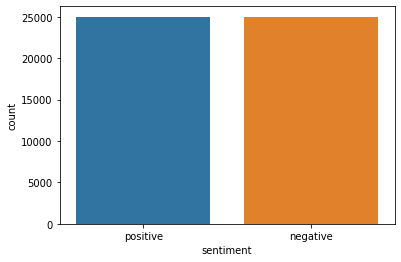

In [12]:
'''
Plot the number of positive an negative reviews
'''

sns.countplot(x=df['sentiment'])

# (Seaborn 2012)

In [13]:
'''
From the graphic above and the output below we can see that there is an even split between positive and negative reviews
'''

df.sentiment.value_counts()

# (The Pandas Development Team 2022)

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [14]:
'''
Check if anything is null in the data set

From below we can see that there are no blank fields
'''
df.isnull().sum()

# (The Pandas Development Team 2022)

review       0
sentiment    0
dtype: int64

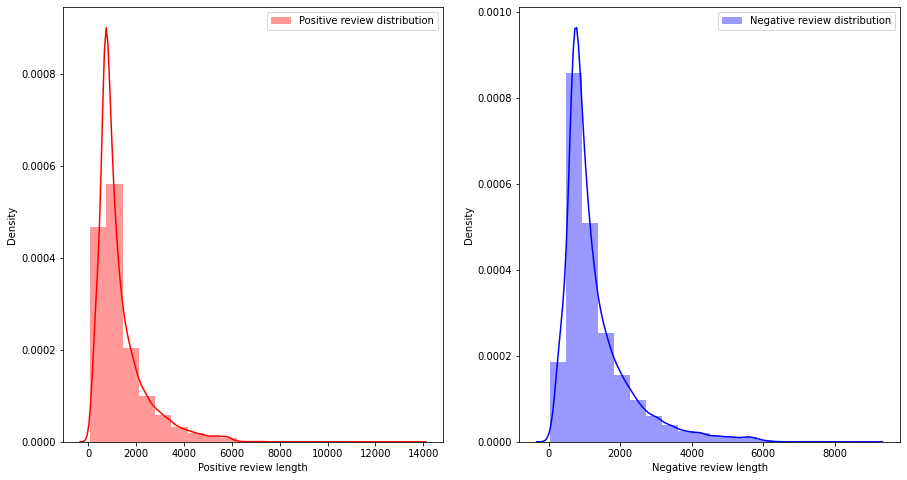

In [15]:
'''
Determine the length or the reviews in both the positive and negative categories
  
From below we can see that the distribution of the length of the reviews is almost similar
'''


df['length']=df['review'].str.len()

f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['sentiment']=='positive']['length'],bins=20,ax=ax[0],label='Positive review distribution',color='r')

ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.distplot(df[df['sentiment']=='negative']['length'],bins=20,ax=ax[1],label='Negative review distribution',color='b')

ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()

# (The Pandas Development Team 2022)
# (Seaborn 2012)

<function matplotlib.pyplot.show(close=None, block=None)>

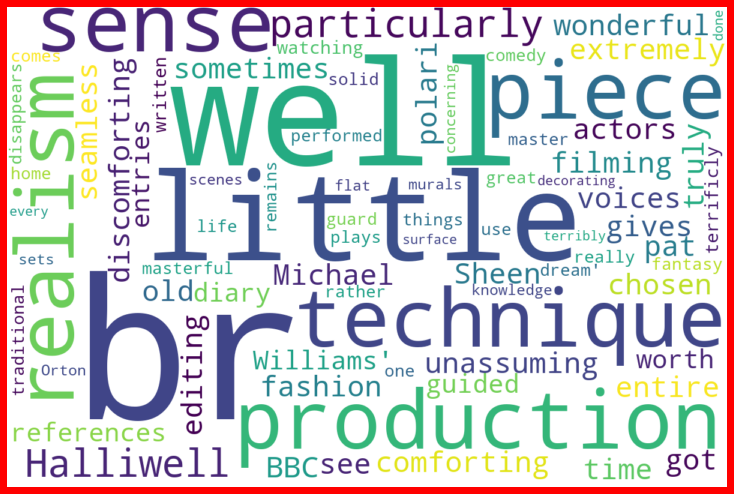

In [16]:
'''
Use Wordcloud to show a visual representation of the most frequent occurring word
The larger the word the more frequently it occurs 

Below this also do a representation for positive and negative sentiments separately
'''

from wordcloud import WordCloud

plt.figure(figsize=(10,10),facecolor='r')
total_text=df['review'][1]
WC=WordCloud(width=1200,height=800,background_color='white', max_words=600,min_font_size=5)
total_words=WC.generate(total_text)
plt.imshow(total_words,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

# (Vu 2019)

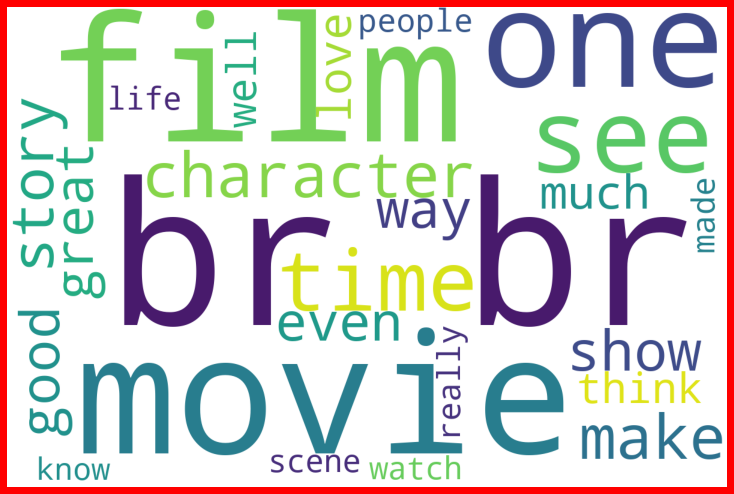

In [17]:
positive=df['review'][df['sentiment']=='positive']
pos_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(positive))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(pos_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

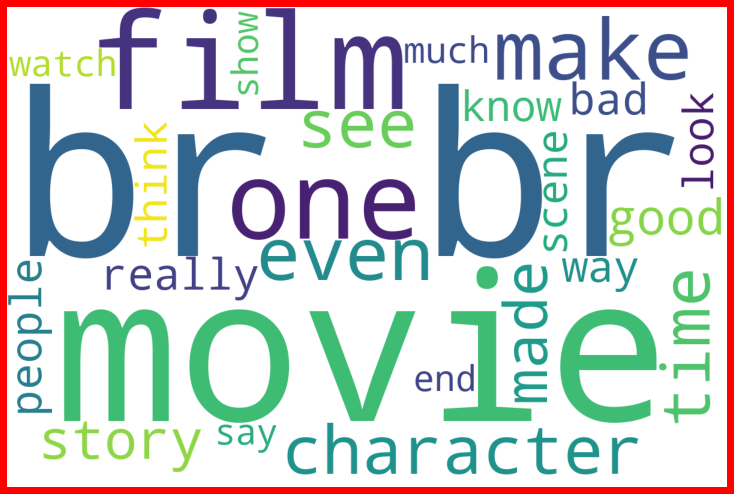

In [18]:
negative=df['review'][df['sentiment']=='negative']
neg_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(negative))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(neg_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

In [19]:
''' 
Remove HTML tags
'''

import re

def remove_html_tags(texthtml):
    return re.sub('<.*?>', '', texthtml)


df["review"] = df["review"].apply(remove_html_tags)
df.head()

# (Python Software Foundation 2009)

,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1761
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,998
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,926
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller 

In [20]:
'''
Remove all of the numbers in the text
'''

def remove_spec_char(textsc):
        return re.sub('0', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('1', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('2', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('3', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('4', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('5', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('6', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('7', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('8', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
def remove_spec_char(textsc):
        return re.sub('9', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)

df.head()

# (Python Software Foundation 2009)


,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1761
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,998
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point : Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,926
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or 

In [21]:
'''   
Make all letters small case
'''
df['review'] = df['review'].str.lower()
df.head()

# (Kumar 2022)

,review,sentiment,length
0,"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,1761
1,"a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",positive,998
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point : risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",positive,926
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or 

In [22]:
'''
Import and remove stopwords, stopwords are common words in a document which do not hold value individually as they are commonly used throughout the 
language used no matter the topic or sentiment
'''

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))

# (tutorialspoint 2022)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
'''
Since the word movie and film would be common in this data set I will remove it as it will not assist in topic or sentiment analysis

These words can be seen in the wordcloud step

Later in the analysis I noticed that the word 'nt' was a common word therefore I cam back to this step and included it in the stop words list
'''
stopword_list = stopwords.words('english')
stopword_list.append('movie')
stopword_list.append('film')
stopword_list.append('nt')
print(stopword_list)

# (tutorialspoint 2022)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
'''
I will apply stopword removal before and after a special character removal this is done so the stop words like you'll and you're can be removed without 
impacting other words which need to be included.

It should be noted that we need to tokenize and then remove stopwords. 

While I could leave the data set tokenized for the sections to follow I will join the words back at so that I can monitor the data set with the 
lenght and word cloud analysis as I go along
''' 

def remove_stopwords(text):
    tokens = [token.strip() for token in word_tokenize(text)]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['review'] = df['review'].apply(remove_stopwords)
df.head()

# (tutorialspoint 2022)

,review,sentiment,length
0,"one reviewers mentioned watching oz episode 'll hooked . right , exactly happened me.the first thing struck oz brutality unflinching scenes violence , set right word go . trust , show faint hearted timid . show pulls punches regards drugs , sex violence . hardcore , classic use word.it called oz nickname given oswald maximum security state penitentary . focuses mainly emerald city , experimental section prison cells glass fronts face inwards , privacy high agenda . em city home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows would n't dare . forget pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess around . first episode ever saw struck nasty surreal , could n't say ready , watched , developed taste oz , got accustomed high levels graphic violence . violence , injustice ( crooked guards 'll sold nickel , inmates 'll kill order get away , well mannered , middle class inmates turned prison bitches due lack street skills prison experience ) watching oz , may become comfortable uncomfortable viewing .... thats get touch darker side .",positive,1761
1,"wonderful little production . filming technique unassuming- old-time-bbc fashion gives comforting , sometimes discomforting , sense realism entire piece . actors extremely well chosen- michael sheen `` got polari '' voices pat ! truly see seamless editing guided references williams ' diary entries , well worth watching terrificly written performed piece . masterful production one great master 's comedy life . realism really comes home little things : fantasy guard , rather use traditional 'dream ' techniques remains solid disappears . plays knowledge senses , particularly scenes concerning orton halliwell sets ( particularly flat halliwell 's murals decorating every surface ) terribly well done .",positive,998
2,"thought wonderful way spend time hot summer weekend , sitting air conditioned theater watching light-hearted comedy . plot simplistic , dialogue witty characters likable ( even well bread suspected serial killer ) . may disappointed realize match point : risk addiction , thought proof woody allen still fully control style many us grown love.this 'd laughed one woody 's comedies years ( dare say decade ? ) . 've never impressed scarlet johanson , managed tone `` sexy '' image jumped right average , spirited young woman.this may crown jewel career , wittier `` devil wears prada '' interesting `` superman '' great comedy go see friends .",positive,926
3,"basically 's family little boy ( jake ) thinks 's zombie closet & parents fighting time.this slower soap opera ... suddenly , jake decides become rambo kill zombie.ok , first 're going make must decide thriller drama ! drama watchable . parents divorcing & arguing like real life . jake closet totally ruins ! expected see boogeyman similar , instead watched drama meaningless thriller spots . well playing parents & descent dialogs . shots jake : ignore .",negative,748
4,"petter mattei 's `` love time money '' visually stunning watch . mr. mattei offers us vivid portrait human relations . seems telling us money , power success people different situations encounter . variation arthur schnitzler 's play theme , director transfers action present time new york different characters meet connect . one connected one way , another next person , one seems know previous point contact . stylishly , sophisticated luxurious look . taken see people live world live habitat.the thing one gets souls picture different stages loneliness one inhabits . big city exactly best place human relations find sincere fulfillment , one discerns case people encounter.the acting good mr. mattei 's direction . steve buscemi , rosario dawson , carol kane , michael imperioli , adrian grenier , rest talented cast , make characters come alive.w

In [25]:
'''
Remove special characters
'''
def remove_spec_char(textsc):
        return re.sub('[^a-zA-Z0-9\s]', '', textsc)
df["review"] = df["review"].apply(remove_spec_char)
df.head()

# (Python Software Foundation 2009)

,review,sentiment,length
0,one reviewers mentioned watching oz episode ll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would nt dare forget pretty pictures painted mainstream audiences forget charm forget romance oz nt mess around first episode ever saw struck nasty surreal could nt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards ll sold nickel inmates ll kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive,1761
1,wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master s comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell s murals decorating every surface terribly well done,positive,998
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown lovethis d laughed one woody s comedies years dare say decade ve never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends,positive,926
3,basically s family little boy jake thinks s zombie closet parents fighting timethis slower soap opera suddenly jake decides become rambo kill zombieok first re going make must decide thriller drama drama watchable parents divorcing arguing like real life jake closet totally ruins expected see boogeyman similar instead watched drama meaningless thriller spots well playing parents descent dialogs shots jake ignore,negative,748
4,petter mattei s love time money visually stunning watch mr mattei offers us vivid portrait human relations seems telling us money power success people different situations encounter variation arthur schnitzler s play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr mattei s direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work,positive,1317


In [26]:
'''
Apply stopwords removal again after special charaters removed
'''

def remove_stopwords(text):
    tokens = [token.strip() for token in word_tokenize(text)]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['review'] = df['review'].apply(remove_stopwords)
df.head()

# (tutorialspoint 2022)

,review,sentiment,length
0,one reviewers mentioned watching oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive,1761
1,wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done,positive,998
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown lovethis laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends,positive,926
3,basically family little boy jake thinks zombie closet parents fighting timethis slower soap opera suddenly jake decides become rambo kill zombieok first going make must decide thriller drama drama watchable parents divorcing arguing like real life jake closet totally ruins expected see boogeyman similar instead watched drama meaningless thriller spots well playing parents descent dialogs shots jake ignore,negative,748
4,petter mattei love time money visually stunning watch mr mattei offers us vivid portrait human relations seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work,positive,1317


In [27]:
'''
Import, download/update before stemming and lemmatization is conducted
'''

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
w_Lemma = WordNetLemmatizer()
p_Stem = PorterStemmer()

# (Jabeen 2018)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shivz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
'''
Compare the use of stemming and lemmatization

From below we can see that while stemming works well in cases where the last part of the word needs to be cut off, it sometimes changes the word 
to a completely inccorect word therefore we will you lemmatization
'''


testwords = ["little", "programs", "programmer", "puppies", "studies", "studying"]
print("***Stem vs Lemma***")
for w in testwords:
    print(w, " : ", p_Stem.stem(w), "vs", w_Lemma.lemmatize(w))
    
    
# (Jabeen 2018)


***Stem vs Lemma***
little  :  littl vs little
programs  :  program vs program
programmer  :  programm vs programmer
puppies  :  puppi vs puppy
studies  :  studi vs study
studying  :  studi vs studying


In [29]:
'''
Using Lemmatization
'''

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    textlemmaed=[w_Lemma.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    filtered_text = ' '.join(textlemmaed)
    return filtered_text

df['review'] = df['review'].apply(lemmatize_text)
df.head()


# (Jabeen 2018)

,review,sentiment,length
0,one reviewer mentioned watching oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive,1761
1,wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done,positive,998
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many u grown lovethis laughed one woody comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wear prada interesting superman great comedy go see friend,positive,926
3,basically family little boy jake think zombie closet parent fighting timethis slower soap opera suddenly jake decides become rambo kill zombieok first going make must decide thriller drama drama watchable parent divorcing arguing like real life jake closet totally ruin expected see boogeyman similar instead watched drama meaningless thriller spot well playing parent descent dialog shot jake ignore,negative,748
4,petter mattei love time money visually stunning watch mr mattei offer u vivid portrait human relation seems telling u money power success people different situation encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connected one way another next person one seems know previous point contact stylishly sophisticated luxurious look taken see people live world live habitatthe thing one get soul picture different stage loneliness one inhabits big city exactly best place human relation find sincere fulfillment one discerns case people encounterthe acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await anxiously next work,positive,1317


In [30]:
'''
Now we will try to adjust for word like 'watching' to change to watch

We will do this by using the POS tagging method for verbs, nouns, adjectives, adverbs and satellite adjectives
'''

def convertv(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(w_Lemma.lemmatize(i,pos="v")))

    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lambda x: convertv(x))


def convertn(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(w_Lemma.lemmatize(i,pos="n")))

    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lambda x: convertn(x))

def converta(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(w_Lemma.lemmatize(i,pos="a")))

    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lambda x: converta(x))

def convertr(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(w_Lemma.lemmatize(i,pos="r")))

    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lambda x: convertr(x))

def converts(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(w_Lemma.lemmatize(i,pos="s")))

    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lambda x: converts(x))


df.head()

# (Chandel 2020)

,review,sentiment,length
0,one reviewer mention watch oz episode hook right exactly happen methe first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy deal shady agreement never far awayi would say main appeal show due fact go show would dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw strike nasty surreal could say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch dark side,positive,1761
1,wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entry well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remain solid disappear play knowledge sen particularly scene concern orton halliwell set particularly flat halliwell mural decorate every surface terribly well do,positive,998
2,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint realize match point risk addiction think proof woody allen still fully control style many u grow lovethis laugh one woody comedy year dare say decade never impress scarlet johanson manage tone sexy image jump right average spirit young womanthis may crown jewel career witty devil wear prada interest superman great comedy go see friend,positive,926
3,basically family little boy jake think zombie closet parent fight timethis slow soap opera suddenly jake decide become rambo kill zombieok first go make must decide thriller drama drama watchable parent divorce argue like real life jake closet totally ruin expect see boogeyman similar instead watch drama meaningless thriller spot well play parent descent dialog shoot jake ignore,negative,748
4,petter mattei love time money visually stun watch mr mattei offer u vivid portrait human relation seem tell u money power success people different situation encounter variation arthur schnitzler play theme director transfer action present time new york different character meet connect one connect one way another next person one seem know previous point contact stylishly sophisticate luxurious look take see people live world live habitatthe thing one get soul picture different stage loneliness one inhabit big city exactly best place human relation find sincere fulfillment one discern case people encounterthe act good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await anxiously next work,positive,1317


<function matplotlib.pyplot.show(close=None, block=None)>

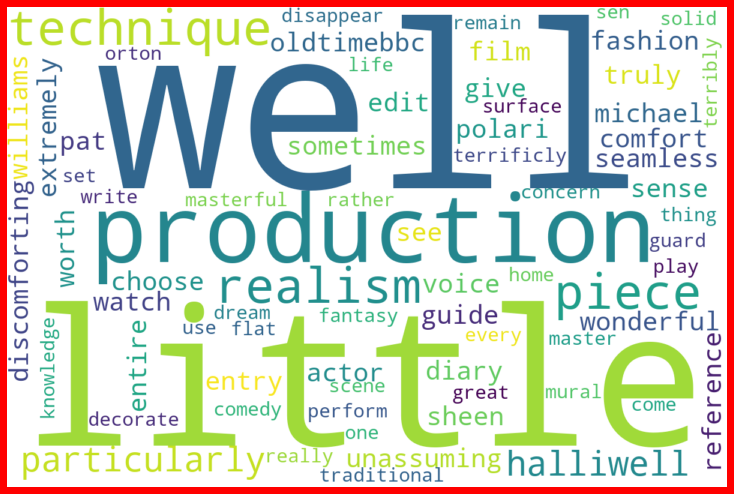

In [31]:
'''
Use Wordcloud again after cleaning to show a visual representation of the most frequent occurring word and then separate positive and negative words
'''

plt.figure(figsize=(10,10),facecolor='r')
total_text=df['review'][1]
WC=WordCloud(width=1200,height=800,background_color='white', max_words=600,min_font_size=5)
total_words=WC.generate(total_text)
plt.imshow(total_words,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

# (Vu 2019)

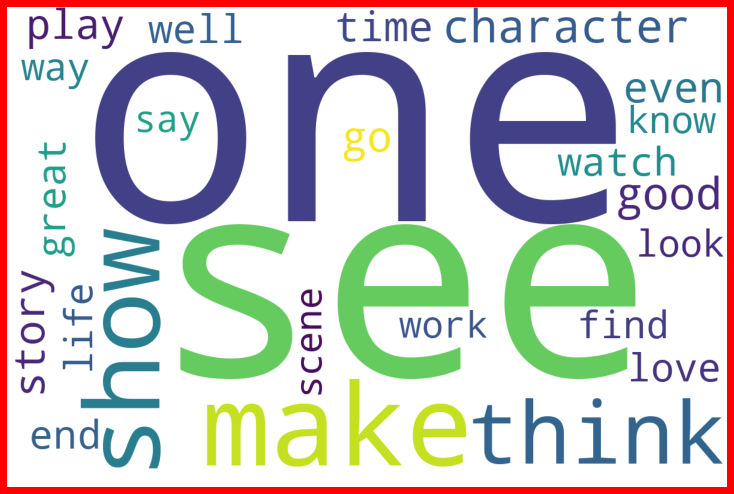

In [32]:
positive=df['review'][df['sentiment']=='positive']
pos_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(positive))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(pos_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

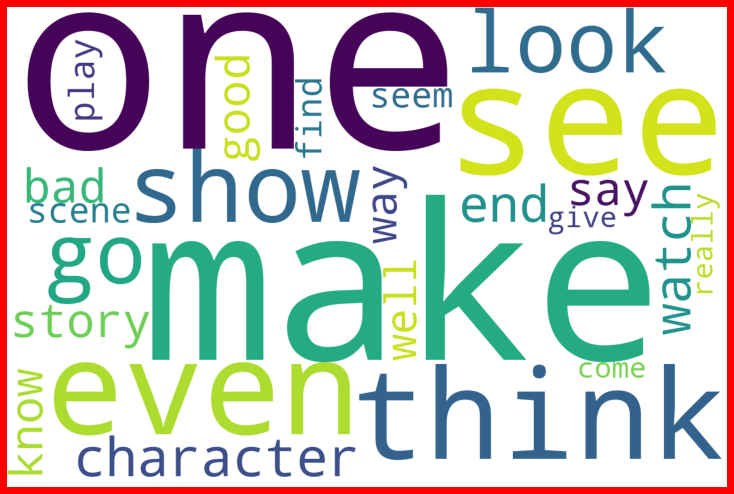

In [33]:
negative=df['review'][df['sentiment']=='negative']
neg_words=WordCloud(width=1200,height=800,background_color='white',max_words=25,min_font_size=5).generate(' '.join(negative))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(neg_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# (Vu 2019)

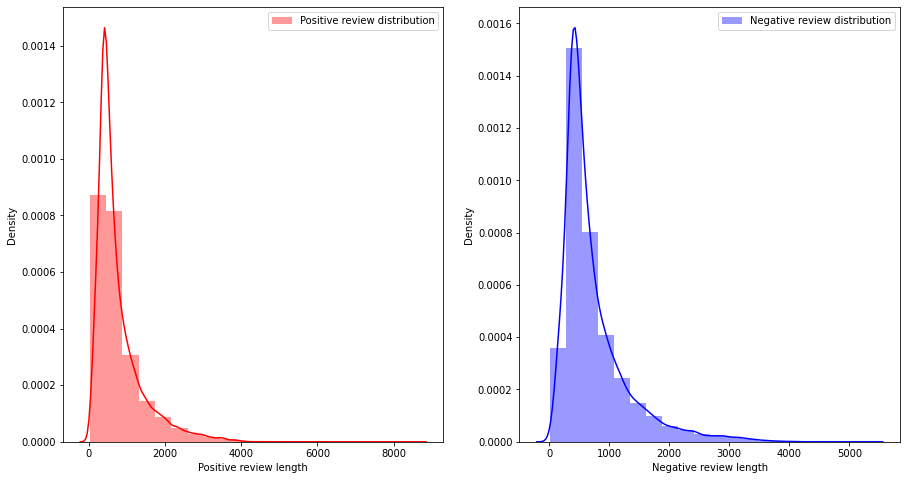

In [34]:
'''
Review the lenghts of the reviews again (almost similar again)
'''
df['length']=df['review'].str.len()

f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['sentiment']=='positive']['length'],bins=20,ax=ax[0],label='Positive review distribution',color='r')

ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.distplot(df[df['sentiment']=='negative']['length'],bins=20,ax=ax[1],label='Negative review distribution',color='b')

ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()

In [35]:
'''
Split the dependent and independent variables
'''

x=df['review']
y=df['sentiment']

# (Refsnes Data 2022)

In [36]:
'''
Use the TF-IDF method to convert the corpos into a matrix which LDA can read

Set max df to 85% due to reasoning of Ganesan (2018) where they assune this is the otimal level

'''
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.85,max_features=1000)
vectors = vectorizer.fit_transform(x)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
x = pd.DataFrame(denselist, columns=feature_names)

# (Scikit-learn developers 2022)

In [37]:
'''
Show the first 10 observations in the vectorized format
'''

x.head(10)

# (Refsnes Data 2022)

,ability,able,absolutely,accent,accept,across,act,action,actor,actress,...,write,writer,wrong,yeah,year,yes,yet,york,young,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.09181,0.0,...,0.107230,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.094134,0.0,0.0,0.000000,0.109903,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.180818
4,0.0,0.0,0.0,0.0,0.0,0.0,0.064620,0.093372,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.133785,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.140631,0.0,0.0,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.092161,0.0,0.0,0.0,0.080675,0.0,0.0,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.097057,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.294163,0.000000


In [38]:
'''
Import and set up the LDA model

Set the number of topics to 10
'''
from sklearn.decomposition import LatentDirichletAllocation 
lda_model=LatentDirichletAllocation(n_components=10, random_state=0)
lda = lda_model.fit(x)

def display_topics(model, feature_names,no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d : " % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words -1:-1]]))
        
# (Scikit-learn developers 2022)

In [39]:
''' 
Show the top 30 words in the 10 topics created from the LDA model

It is important to remember that the LDA model does not understand words but it groups words together based on their frequency 
in the different observations in the corpos
 
'''

no_top_words =30
display_topics(lda, feature_names,no_top_words)

# (Refsnes Data 2022)

Topic 0 : 
bad watch make see good like one even act get think would time movie waste ever could really go say plot look funny people actor thing awful terrible money know
Topic 1 : 
one get game good play action like make go see scene character cop police time murder great take story man guy end also car bad kill well look plot even
Topic 2 : 
see love great watch like one good funny time think get show make really kid song comedy go would year saw movie laugh best enjoy know well say fun story
Topic 3 : 
get like one bad scene make go guy see kill girl good end look would even really killer watch think people sex know thing say time character could woman plot
Topic 4 : 
character good story book like one make see really think watch would much well great act seem actor time end read could get scene plot say even feel performance give
Topic 5 : 
horror one good zombie like make bad monster get see vampire gore effect really look film go scene movie scary even story watch blood much act

In [40]:
'''
Show the visual of the LDA topic results using pyLDAVis which is an interactive visual tool
'''
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, vectors, vectorizer, mds='tsne')
vis

# (Mabey 2022)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  15.576770
8       0.648955  71.707100       2        1  12.532066
4      71.019684   9.971006       3        1  12.103125
6       3.785981  33.185135       4        1  11.250493
2     -42.666500  -9.222070       5        1  11.134849
3      -3.621689 -43.526516       6        1   8.668697
1      -3.632402  -4.171708       7        1   8.568636
5     -36.584400  35.804413       8        1   8.144617
9      44.391380  50.615383       9        1   6.294577
7      40.235809 -31.591665      10        1   5.726170, topic_info=        Term         Freq        Total Category  logprob  loglift
288  episode   521.000000   521.000000  Default  30.0000  30.0000
781     show  1420.000000  1420.000000  Default  29.0000  29.0000
767   series   609.000000   609.000000  Default  28.0000  28.0000
426   horror   634.000000   634.000000  Default  27.0000  27.0000
757   season   228.000000   228.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
696   really    82.109374  1420.892760  Topic10  -5.4202   0.0091
384       go    78.338214  1467.391588  Topic10  -5.4672  -0.0701
566     much    71.112347  1175.153742  Topic10  -5.5640   0.0552
837    story    73.660779  1488.928731  Topic10  -5.5288  -0.1462
293     even    72.468513  1402.090431  Topic10  -5.5451  -0.1024

[627 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3         1  0.207841  accent
3         2  0.080827  accent
3         3  0.282895  accent
3         4  0.138561  accent
3         5  0.051960  accent
...     ...       ...     ...
999       5  0.009350  zombie
999       6  0.046748  zombie
999       7  0.004675  zombie
999       8  0.827436  zombie
999       9  0.009350  zombie

[3813 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 5, 7, 3, 4, 2, 6, 10, 8])

In [41]:
'''
I will now implement logistic regression as this model works best with deciding binary outcomes
In the case of this dataset, wheather or not a review is a positive or negitive one

Take the reviews into a new x varible 
'''

x1=df['review']
print(len(x))

# (The Pandas Development Team 2022)

50000


In [42]:
'''
Start from after the text was cleaned to include a pipeline in logistic regression

1st the data will be run through TF-IDF then the Logistic Regression model

Should I want to replicate the process I will use the "LR_pipe" for future data sets
'''

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



LR_pipe = Pipeline([('tfidf', TfidfVectorizer(max_df=0.85,max_features=1000)),
                     ('LR', LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)),])

# (Scikit-learn developers 2022)

In [43]:
'''
Before model is fit split the observations into a training and testing set
'''

from sklearn.model_selection import train_test_split 

from sklearn.model_selection import train_test_split 
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, train_size=0.7, random_state=42, stratify=y)

print(len(y_train))
print(len(y_test))

# (Scikit-learn developers 2022)

35000
15000


In [44]:
'''
Import the accuracy score then run and test the model using the pipe

From below we can see that the score is high at 0.874333*
'''

from sklearn.metrics import accuracy_score

LR_pipe_fit = LR_pipe.fit(x1,y)

LR_pipe_predict = LR_pipe.predict(x1_test)

LR_pipe_score=accuracy_score(y_test,LR_pipe_predict)

print("logistic regression score :",LR_pipe_score)

# (Scikit-learn developers 2022)

logistic regression score : 0.8721333333333333


In [45]:
'''
Show the classification report
'''

from sklearn.metrics import classification_report

LR_pipe_report=classification_report(y_test,LR_pipe_predict,target_names=['Positive','Negative'])
print(LR_pipe_report)

# (Scikit-learn developers 2022)

              precision    recall  f1-score   support

    Positive       0.88      0.86      0.87      7500
    Negative       0.87      0.88      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



[[6478 1022]
 [ 896 6604]]


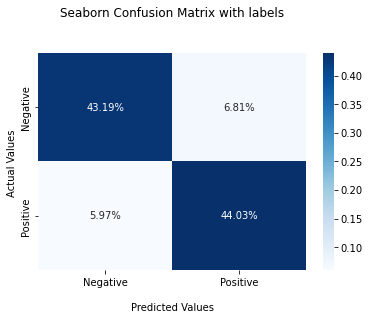

In [46]:
'''
Import the confusion matrix visual model to see how often the model gets each category right

From the heat map below we can see that the model predicted the model correctly by the percentage in the dark blue boxes of the total observations

NB* of the 15000 observations tested 50% were negative and 50% were positve 
'''

from sklearn.metrics import confusion_matrix

cm_pipe=confusion_matrix(y_test,LR_pipe_predict)
print(cm_pipe)

ax = sns.heatmap(cm_pipe/np.sum(cm_pipe), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

plt.show()

# (Scikit-learn developers 2022)

In [47]:
'''
Reference list 

Chandel, S. (2020) python - Lemmatization of pandas column using Wordnet after POS. [Online]. 3 January 2020. Available at: https://stackoverflow.com/questions/59576880/lemmatization-of-pandas-column-using-wordnet-after-pos (Accessed: 12 June 2022).

DataRobot (2020) Text processing: what, why, and how. [Online]. 6 August 2020. Available at: https://www.datarobot.com/blog/text-processing-what-why-and-how/#:~:text=The%20term%20text%20processing%20refers (Accessed: 12 June 2022).

Ganesan, K. (2018) Tips for Constructing Custom Stop Word Lists. [Online]. 26 July 2018. Available at: https://kavita-ganesan.com/tips-for-constructing-custom-stop-word-lists/#.YqnQAqSxUzQ (Accessed: 15 June 2022).

Gupta, T. (2021) Types of Data Sets in Data Science, Data Mining & Machine Learning. [Online]. 18 November 2021. Available at: https://towardsdatascience.com/types-of-data-sets-in-data-science-data-mining-machine-learning-eb47c80af7a (Accessed: 17 June 2022).

Jabeen, H. (2018) Stemming and Lemmatization in Python. [Online]. 23 October 2018. Available at: https://www.datacamp.com/tutorial/stemming-lemmatization-python (Accessed: 14 June 2022).

Kumar, G.S. (2022) Convert Column Values to Lowercase in Pandas Dataframe – thisPointer. [Online]. 2022. Available at: https://thispointer.com/convert-column-values-to-lowercase-in-pandas-dataframe/ (Accessed: 14 June 2022).

Lakshmipathi, N. (2019) IMDB Dataset of 50K Movie Reviews. [Online]. 2019. Available at: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews (Accessed: 2 June 2022).

Mabey, B. (2022) pyLDAvis. [Online]. 16 June 2022. Available at: https://github.com/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb (Accessed: 16 June 2022).

Python Software Foundation (2009) re — Regular expression operations — Python 3.7.2 documentation. [Online]. 2009. Available at: https://docs.python.org/3/library/re.html (Accessed: 11 June 2022).

Refsnes Data (2022) Learn Python. [Online]. 2022. www.w3schools.com. Available at: https://www.w3schools.com/python/default.asp (Accessed: 2 May 2022).

Scikit-learn developers (2022) scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [Online]. 2022. Available at: https://scikit-learn.org/stable/index.html (Accessed: 21 May 2022).

Seaborn (2012) seaborn: statistical data visualization — seaborn 0.9.0 documentation. [Online]. 2012. Available at: https://seaborn.pydata.org/ (Accessed: 15 June 2022).

The Pandas Development Team (2022) Pandas Documentation. [Online]. 6 April 2022. Available at: https://pandas.pydata.org/docs/index.html (Accessed: 2 May 2022).

tutorialspoint (2022) Python - Remove Stopwords - Tutorialspoint. [Online]. 2022. Available at: https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm#:~:text=Stopwords%20are%20the%20English%20words (Accessed: 14 June 2022).

Vu, D. (2019) Python Word Clouds Tutorial: How to Create a Word Cloud. [Online]. 8 November 2019. Available at: https://www.datacamp.com/tutorial/wordcloud-python (Accessed: 12 June 2022).

'''
print()